Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`.

# Analyzing Chicken and Eggs
The goal of this assignment is to recreate the analysis of the chicken and eggs data set presented in this video:  
https://www.youtube.com/watch?v=j6ClFJhnG18

Watch the video. The first half is about visualization in general, the chicken and egg analysis starts at about 9:50. Note that the author uses R rather than Python.

The data set is unfortunately not available, so a dataset has been created, saved as `chicken.csv`. There are differences in the numbers, but the character should be the same.

In A. Analysis below, the different analysis steps are prepared for you. For all plots, you are asked to produce the plot first with Pandas.plot() and then with Seaborn. Section B. Reflection asks you to think about both of these ways of plotting, which you prefer and for what cases. 

In [36]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## A. Analyzing the data

### 0. Read in the data 

In [37]:
# Your solution goes here
df_chicken = pd.read_csv('chicken.csv')

### 1. Weight by diet summary stats (Pandas groupby and describe)

In [38]:
# Your solution goes here
df_chicken.groupby('diet')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,3634.852500,447.654043,2683.9,3284.250,3601.10,3952.375,4845.0
B,120.0,3351.299167,316.871704,2690.3,3122.175,3333.55,3590.400,4057.6
C,120.0,3415.831667,449.476292,2383.3,3114.500,3417.85,3731.375,4508.7


### 2. Eggs by diet summary stats (Pandas groupby and describe)

In [39]:
# Your solution goes here
df_chicken.groupby('diet')['eggs'].describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,4.483333,0.501817,4.0,4.0,4.0,5.0,5.0
B,120.0,4.033333,0.709282,3.0,4.0,4.0,5.0,5.0
C,120.0,4.175000,0.706066,3.0,4.0,4.0,5.0,5.0


### 3.1 Histogram of age of chickens (Pandas hist())

array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

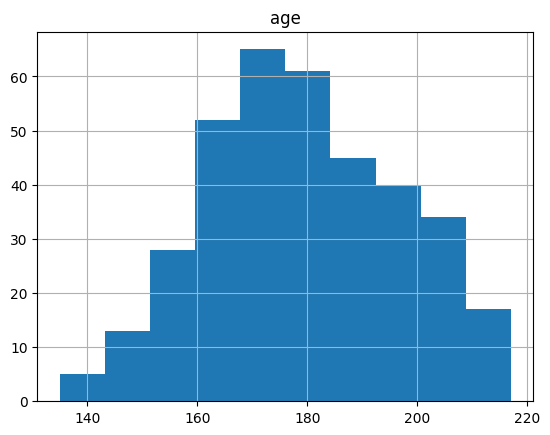

In [40]:
# Your solution goes here
df_chicken.hist("age")

### 3.2 Histogram of age of chickens (Seaborn distplot())

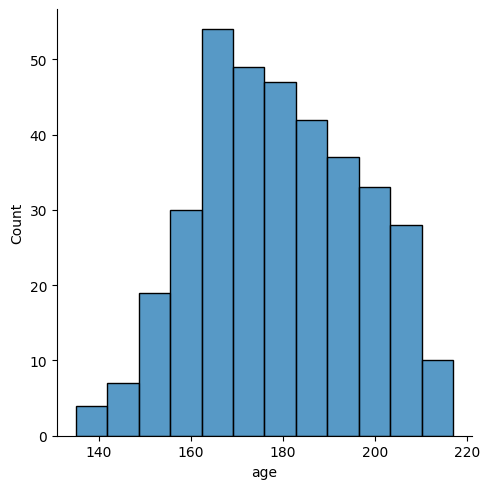

In [41]:
# Your solution goes here
sns.displot(data = df_chicken['age'])

### 4.1 Boxplot age (Pandas boxplot())

<AxesSubplot: >

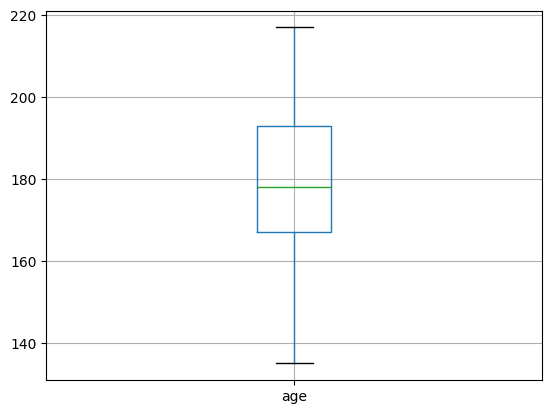

In [42]:
# Your solution goes here
df_chicken.boxplot('age')

### 4.2 Boxplot age (Seaborn boxplot())

<AxesSubplot: ylabel='age'>

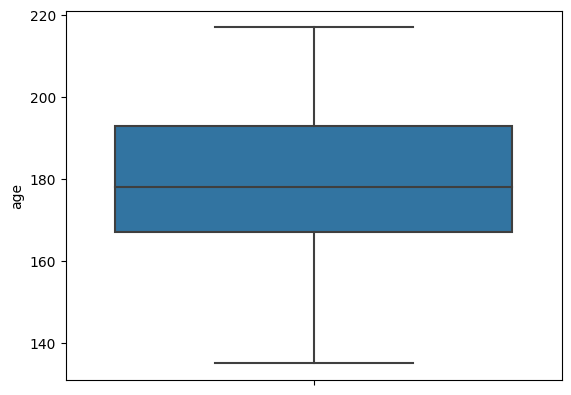

In [43]:
# Your solution goes here
sns.boxplot(y = df_chicken['age'])

### 5.1 Plot average weight vs weeks by diet (Pandas plot() on groupby()) 
Hint: groupby week and diet, calculate mean, get the weight colum, unstack and plot  
see here for more details:  
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

<AxesSubplot: xlabel='week'>

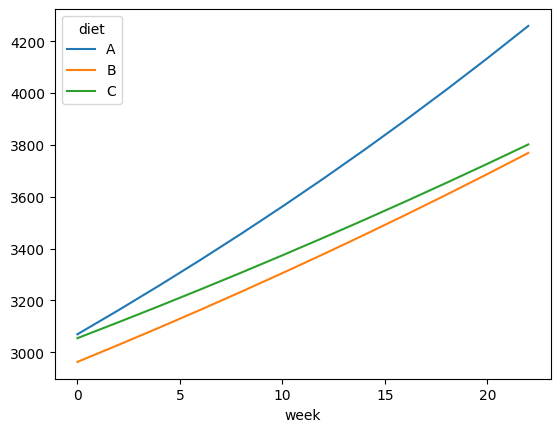

In [44]:
# Your solution goes here
df_chicken.groupby(['diet','week']).mean()['weight'].unstack(0).plot()


### 5.2 Plot average weight vs weeks by diet (Seaborn pointplot()) 
Hint: set `ci=None` to not get error bars

<AxesSubplot: xlabel='week', ylabel='weight'>

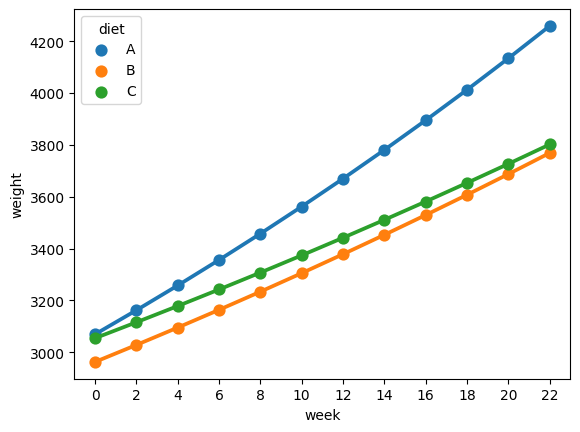

In [45]:
# Your solution goes here
sns.pointplot(x ='week', y='weight', hue='diet', errorbar= None, data=df_chicken)

### 6.1 Plot average eggs vs weeks by diet (Pandas plot() on groupby()) 
Hint: It might be good to start y axis at 0

<AxesSubplot: xlabel='week', ylabel='Number of eggs'>

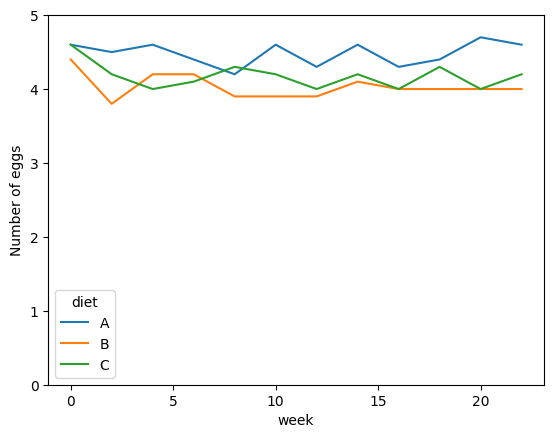

In [46]:
# Your solution goes here
df_chicken.groupby(['week','diet']).mean()['eggs'].unstack(1).plot(ylim=(0,5), ylabel='Number of eggs')

### 6.2 Plot average eggs vs weeks by diet (Seaborn pointplot()) 
Hint: It might be good to start y axis at 0

(0.0, 5.0)

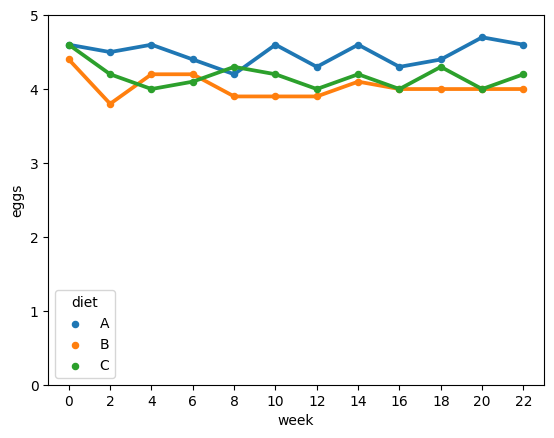

In [47]:
# Your solution goes here
sns.pointplot(x ='week', y='eggs', hue='diet', errorbar= None, data=df_chicken, markers = '.')
plt.ylim(0,5)

### 7. Average age by diet stats (Pandas groupby())

In [48]:
# Your solution goes here
df_chicken.groupby('diet')['age'].mean()

diet
A    166.5
B    187.9
C    183.4
Name: age, dtype: float64

### 8.1 Scatter plot eggs vs age by diet (Pandas plot.scatter())
Hint: You need to loop over the diet 'A', 'B', 'C' and plot each seperatly in the same axes. Use `ax=plt.gca()` to get repeated plots to appear in the same axes. For more info, have a look at the following thread:  
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib


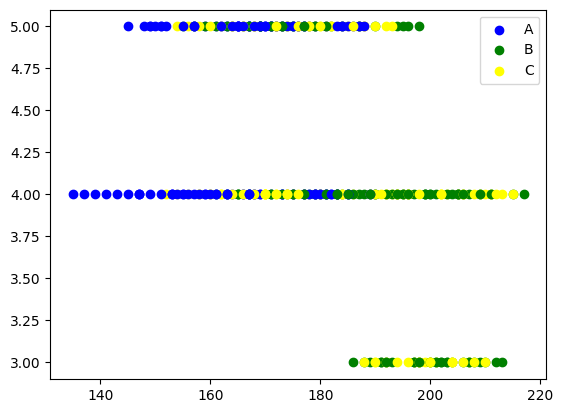

In [49]:
# Your solution goes here

for row in df_chicken.itertuples():
    if row.diet == 'A':
        plt.scatter(row.age,row.eggs, c='blue', label='A')
    elif row.diet == 'B':
        plt.scatter(row.age,row.eggs, c='green', label='B')
    else:
        plt.scatter(row.age,row.eggs, c='yellow', label='C')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels,handles))
plt.legend(by_label.values(), by_label.keys())

### 8.2 Scatter plot eggs vs age by diet (Seaborn scatterplot()) 


<AxesSubplot: xlabel='age', ylabel='eggs'>

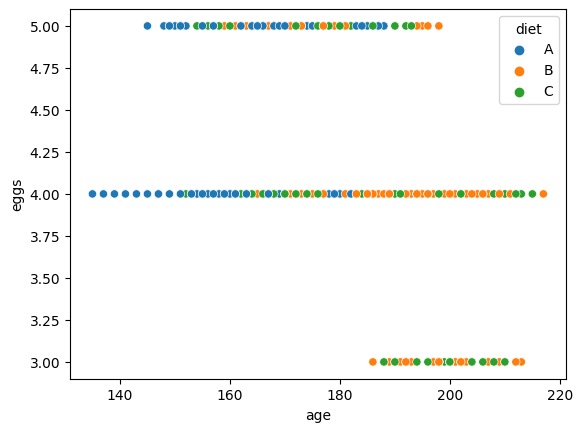

In [50]:
# Your solution goes here
sns.scatterplot(x ='age', y='eggs', hue='diet', data=df_chicken, markers = '.')

### 9.1 Boxplot age by diet (Pandas boxplot())

<AxesSubplot: title={'center': 'age'}, xlabel='diet'>

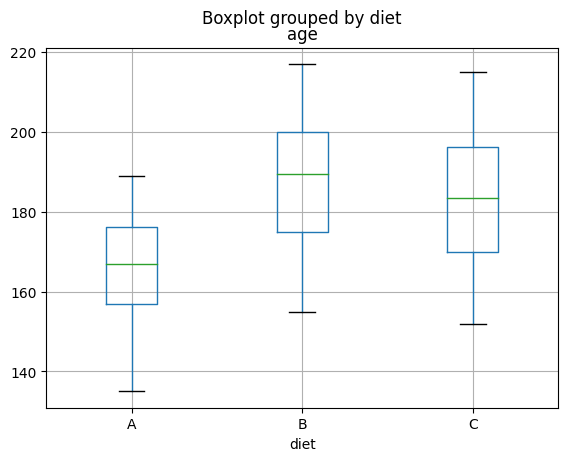

In [51]:
# Your solution goes here
df_chicken.boxplot('age', 'diet')

### 9.2 Boxplot age by diet (Seaborn boxplot())

<AxesSubplot: xlabel='diet', ylabel='age'>

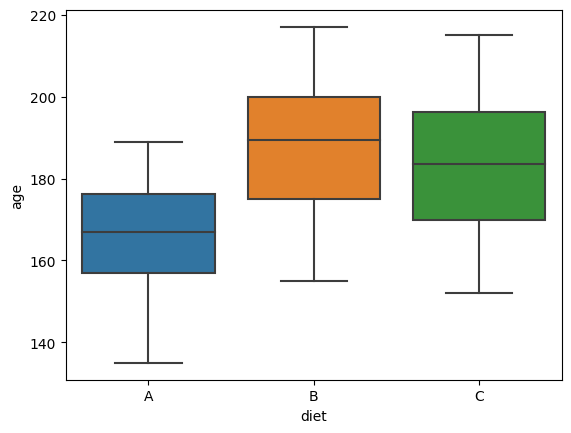

In [52]:
# Your solution goes here
sns.boxplot(y=df_chicken['age'], x = df_chicken['diet'])

## B. Reflection
After plotting with Pandas and Seaborn, in your opinion:
1. What are the strengths/weaknesses of Pandas?
2. What are the strengths/weaknesses of Seaborn?
3. When would you use Pandas and when would you use Seaborn?

**Your answers can go here:**
1. Pandas groupby function made it easy to see a table of data and how it was sorted. Also pandas describe function is an easy way to see simple statistical analysis on a pandas dataframe that is grouped. Pandas weaknesses appear to be that many times the plots it produces are not aesthetically as pleasing as other plotting modules -- comparing the box plot
in 9.1 to the boxplot in 9.2 we can see that the base pandas box plot has no colour. Often times seaborn was able to plot the same graph as matplotlib in fewer lines. For example in the scatter plot in 8.1 and 8.2 matplotlib required 10 lines of code (including a for loop) while seaborn produced the same scatter in one line.

2. Seaborn's advantages seem to be that it can provide similar graphs to pandas in fewer lines and the plots are aesthetically more pleasing (see box plot 9.1 vs 9.2). Disadvantages of seaborn are that it is not a built in library to python, additionally it is less customizable and powerful than pandas and matplotlib.

3. Pandas is useful when you want to analyze and manipulate data and see raw data in a table form. Seaborn appears to be much easier to plot data, especially when creating simple plots where they often are able to be created in fewer lines than matplotlib and pandas dataframe.









Reviewed and ready to push - SR